In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.drop(['instant','casual','registered','dteday'],axis=1,inplace=True)

In [7]:
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
df['weathersit'].replace({1:"ClearFewClouds",2:"MistCloudy",3:"LightRainLightSnowThunderstorm",4:'HeavyRainIcePalletsThunderstormMist'},inplace=True)
df['weekday'].replace({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thur",5:"Fri",6:"Sat"},inplace=True)
df['mnth'] = df['mnth'].replace({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,ClearFewClouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,ClearFewClouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,ClearFewClouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Thur,1,ClearFewClouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Fri,1,MistCloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Sat,0,MistCloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Sun,0,ClearFewClouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Mon,1,ClearFewClouds,6.184153,7.54440,48.2917,14.958889,1321


In [9]:
df[['temp','atemp','hum','windspeed','cnt']]=df[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


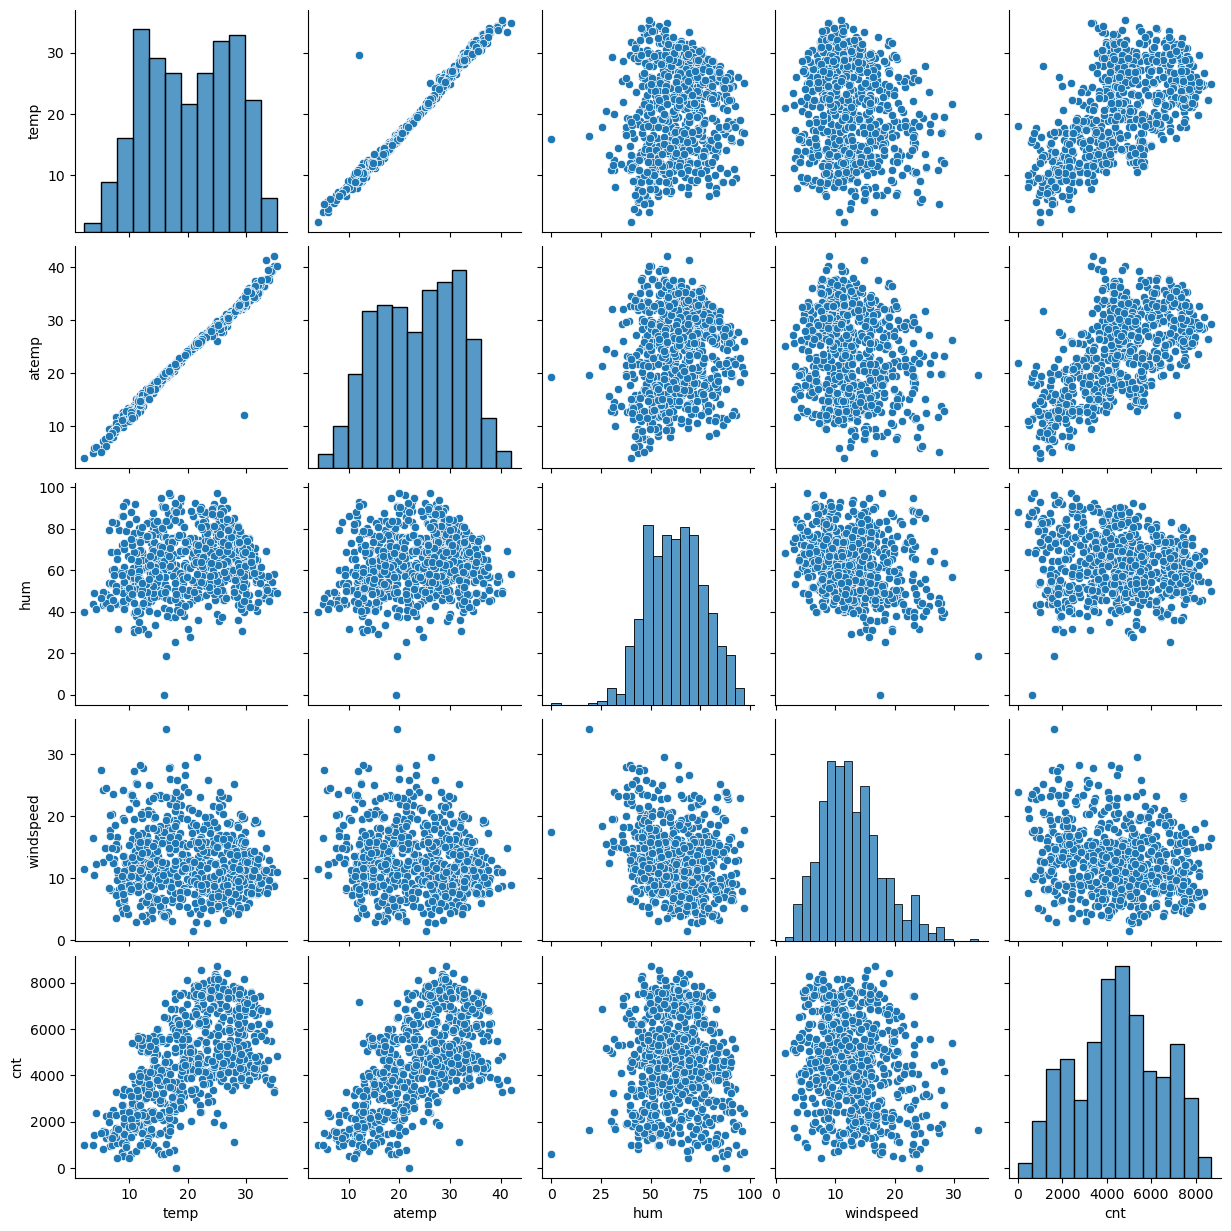

In [11]:
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

In [12]:
correlation = df['temp'].corr(df['atemp'])
correlation

0.9916961786905648

In [13]:
df.drop(['temp'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


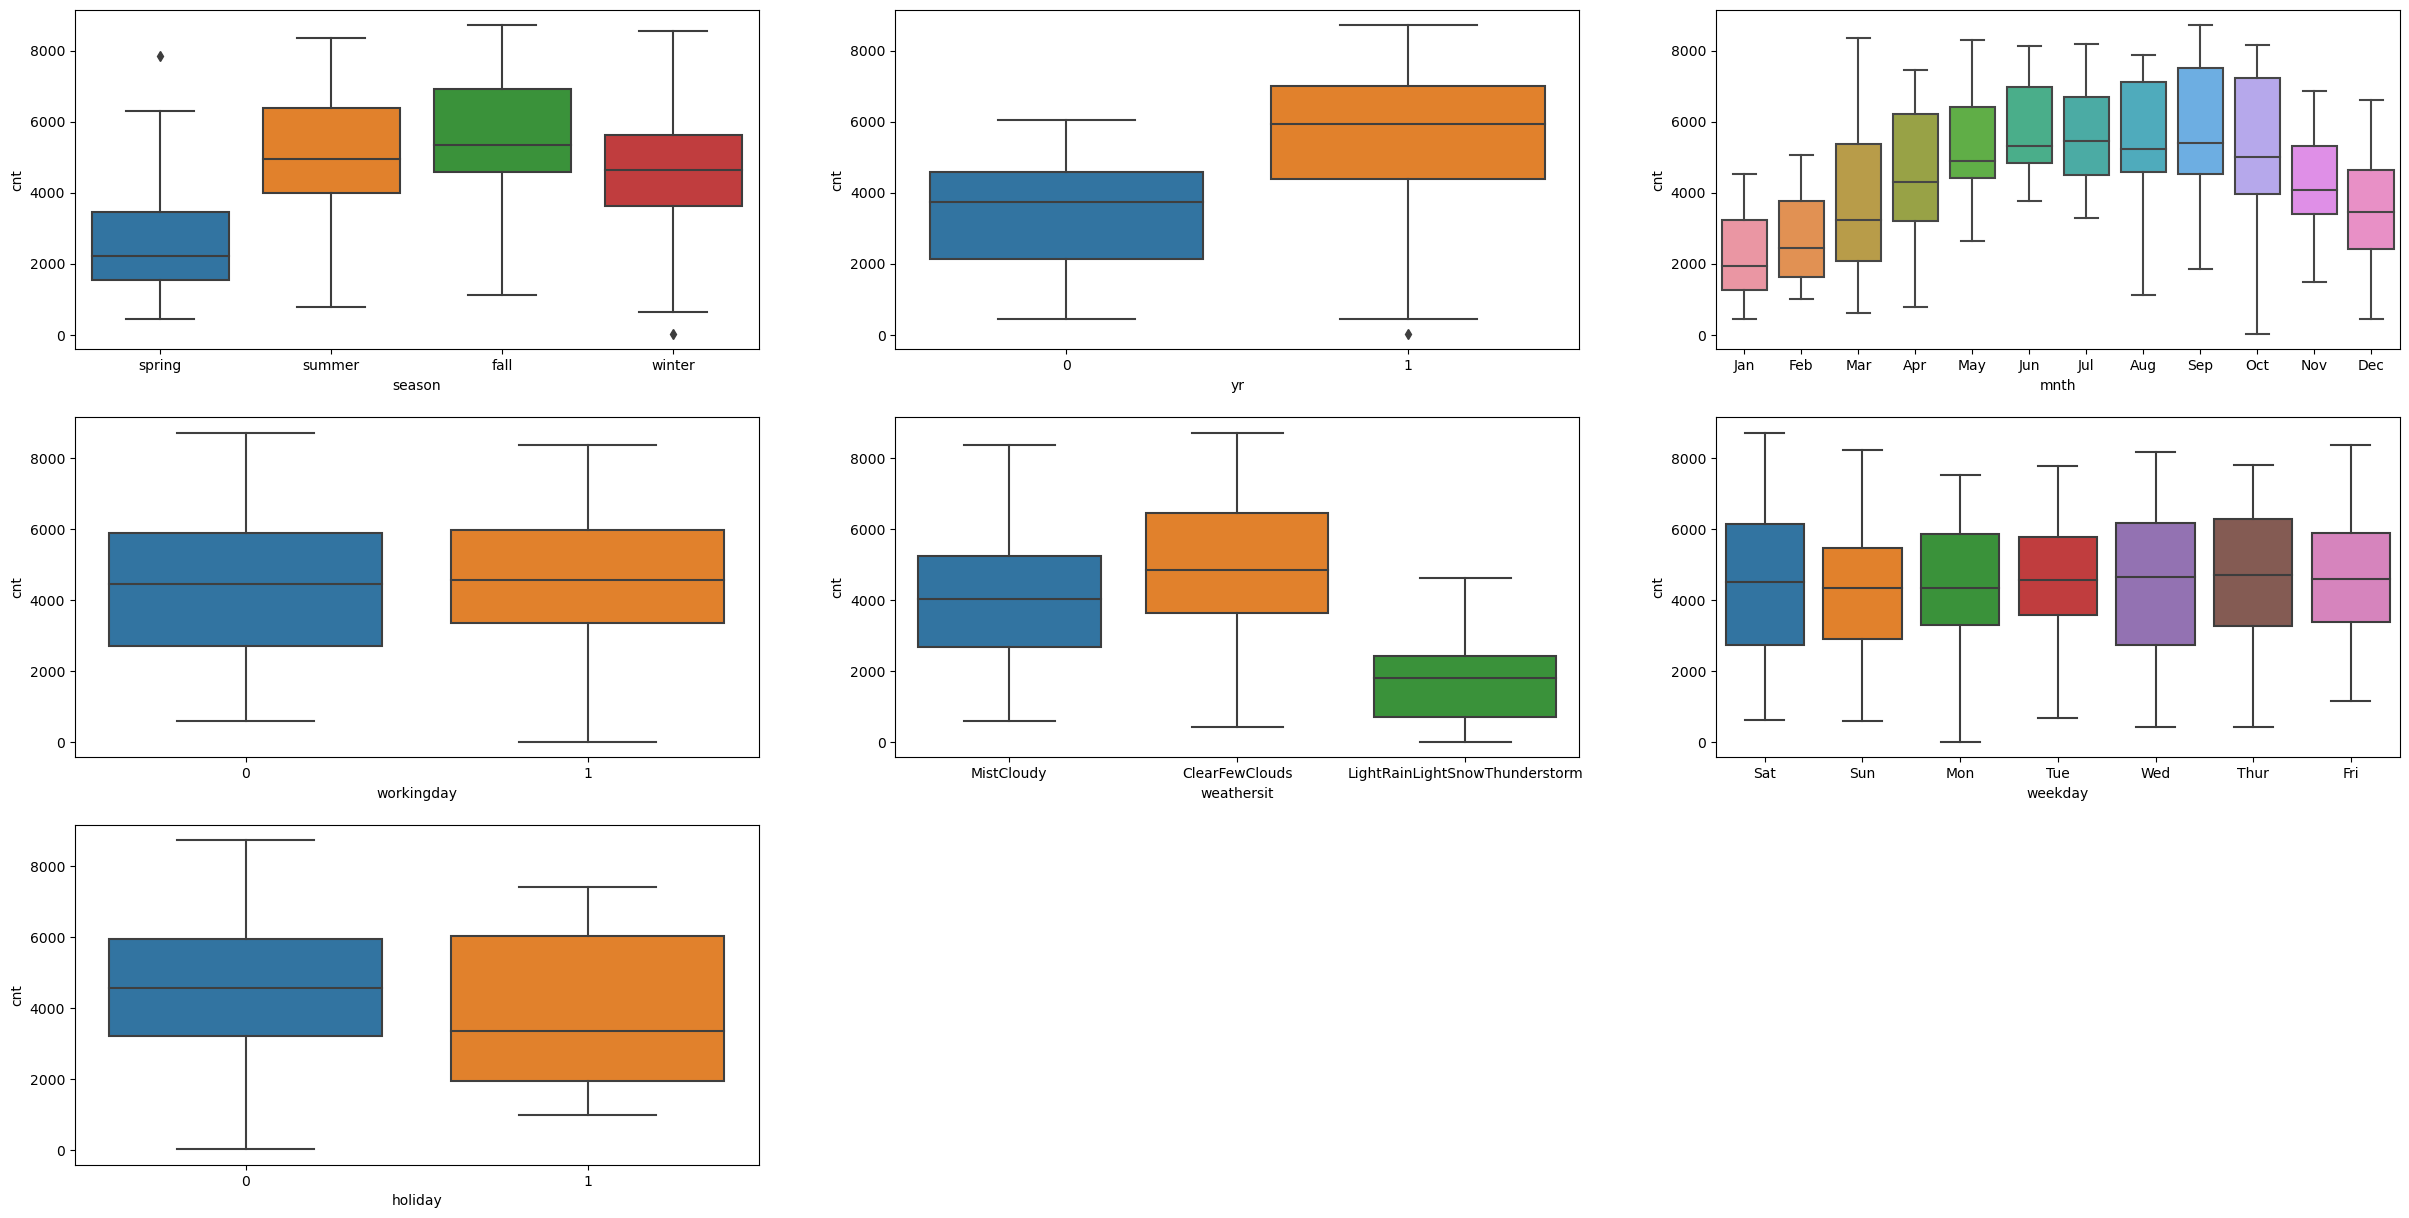

In [14]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

In [15]:
df['mnth']=df['mnth'].astype(object)
df['season']=df['season'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df['weekday']=df['weekday'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [16]:
Season_condition=pd.get_dummies(df['season'],drop_first=True)
Weather_condition=pd.get_dummies(df['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
Month=pd.get_dummies(df['mnth'],drop_first=True)

In [17]:
df=pd.concat([df,Season_condition],axis=1)
df=pd.concat([df,Weather_condition],axis=1)
df=pd.concat([df,Day_of_week],axis=1)
df=pd.concat([df,Month],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   season                          730 non-null    object 
 1   yr                              730 non-null    int64  
 2   mnth                            730 non-null    object 
 3   holiday                         730 non-null    int64  
 4   weekday                         730 non-null    object 
 5   workingday                      730 non-null    int64  
 6   weathersit                      730 non-null    object 
 7   atemp                           730 non-null    float64
 8   hum                             730 non-null    float64
 9   windspeed                       730 non-null    float64
 10  cnt                             730 non-null    int64  
 11  spring                          730 non-null    uint8  
 12  summer                          730 

In [18]:
df.drop(['season'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

df.drop(['weekday'],axis=1,inplace=True)

df.drop(['mnth'],axis=1,inplace=True)


df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
# X.columns = X.columns.astype(str)
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,11.5850,48.3333,23.500518,1796,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
scaler=MinMaxScaler()

In [22]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [23]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


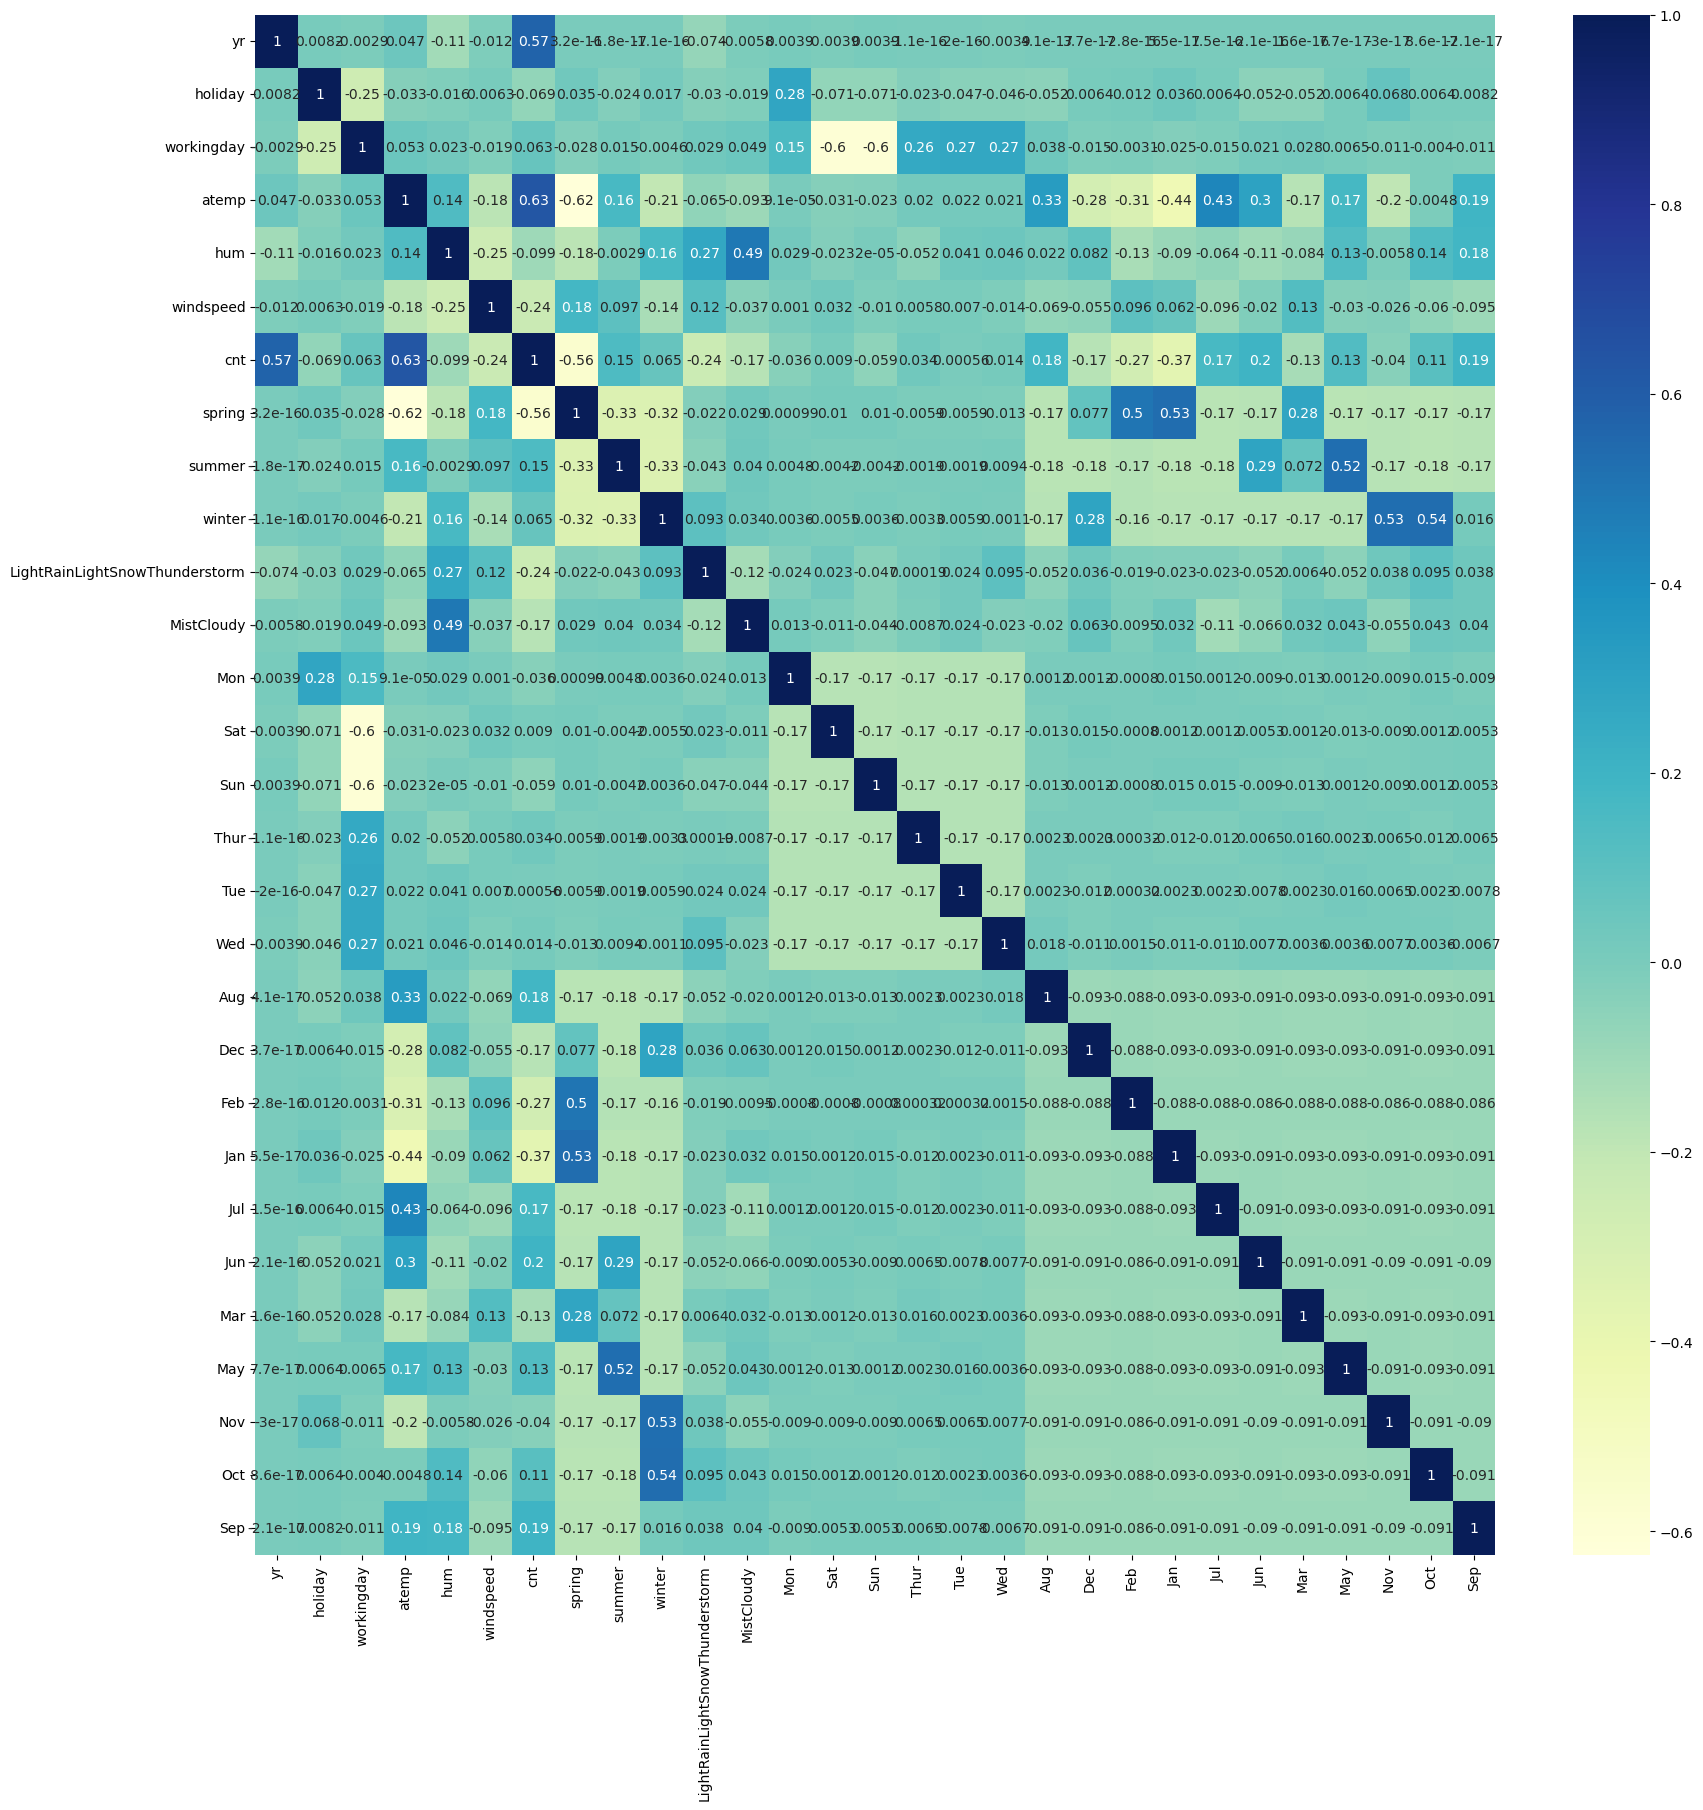

In [24]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [25]:
y_train = df_train.pop('cnt')
X_train = df_train

In [26]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,LightRainLightSnowThunderstorm,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              510 non-null    int64  
 1   holiday                         510 non-null    int64  
 2   workingday                      510 non-null    int64  
 3   atemp                           510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   spring                          510 non-null    uint8  
 7   summer                          510 non-null    uint8  
 8   winter                          510 non-null    uint8  
 9   LightRainLightSnowThunderstorm  510 non-null    uint8  
 10  MistCloudy                      510 non-null    uint8  
 11  Mon                             510 non-null    uint8  
 12  Sat                             510

In [48]:
X_train_sm = sm.add_constant(X_train[['atemp','yr','holiday','spring','LightRainLightSnowThunderstorm','MistCloudy','Mar','May','Jun','Aug','Sep','Sun','Jul','Oct']])
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params


const                             0.253023
atemp                             0.401511
yr                                0.236169
holiday                          -0.093797
spring                           -0.144531
LightRainLightSnowThunderstorm   -0.307510
MistCloudy                       -0.084564
Mar                               0.027449
May                               0.028986
Jun                               0.013451
Aug                               0.013165
Sep                               0.086406
Sun                              -0.048442
Jul                              -0.040427
Oct                               0.069071
dtype: float64

In [49]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     170.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.27e-179
Time:                        23:01:18   Log-Likelihood:                 488.16
No. Observations:                 510   AIC:                            -946.3
Df Residuals:                     495   BIC:                            -882.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.2530      0.019     13.081      0.000       0.215       0.291
atemp                              0.4015      0.042      9.555      0.000       0.319       0.484
yr                                 0.2362      0.008     27.894      0.000       0.220       0.253
holiday                           -0.0938      0.027     -3.481      0.001      -0.147      -0.041
spring                            -0.1445      0.013    -10.944      0.000      -0.170      -0.119
LightRainLightSnowThunderstorm    -0.3075      0.026    -12.053      0.000      -0.358      -0.257
MistCloudy                        -0.0846      0.009     -9.338      0.000      -0.102      -0.067
Mar                                0.0274      0.016      1.760      0.079      -0.003       0.058
May                                0.0290      0.019      1.490      0.137      -0.009       0.067
Jun                                0.0135      0.023      0.596      0.552      -0.031       0.058
Aug                                0.0132      0.022      0.605      0.545      -0.030       0.056
Sep                                0.0864      0.020      4.240      0.000       0.046       0.126
Sun                               -0.0484      0.012     -4.026      0.000      -0.072      -0.025
Jul                               -0.0404      0.025     -1.637      0.102      -0.089       0.008
Oct                                0.0691      0.017      3.964      0.000       0.035       0.103
==============================================================================
Omnibus:                       85.783   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.304
Skew:                          -0.776   Prob(JB):                     3.32e-59
Kurtosis:                       6.203   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(lr_model.coef)

AttributeError: 'OLSResults' object has no attribute 'coef'

In [31]:
y_train_pred = lr_model.predict(X_train_sm)

In [32]:
y_train_pred

653    0.759473
576    0.756464
426    0.463800
728    0.376662
482    0.561915
         ...   
526    0.724105
578    0.833346
53     0.196321
350    0.258214
79     0.370182
Length: 510, dtype: float64

In [33]:
res = y_train - y_train_pred

<Axes: ylabel='Density'>

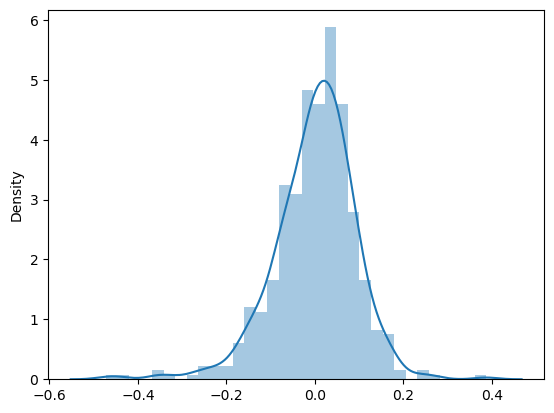

In [34]:
sns.distplot(res)

In [35]:
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [36]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
y_test = df_test.pop('cnt')

In [38]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [39]:
X_test = df_test

In [40]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,1.0,0,1,0,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
X_test_sm = X_test_sm[['const','atemp','yr','holiday','spring','LightRainLightSnowThunderstorm','MistCloudy','Mar','May','Jun','Aug','Sep','Sun','Jul','Oct']]

In [42]:
X_test_sm.head()

,const,atemp,yr,holiday,spring,LightRainLightSnowThunderstorm,MistCloudy,Mar,May,Jun,Aug,Sep,Sun,Jul,Oct
184,1.0,0.769660,0,1,0,0,1,0,0,0,0,0,0,1,0
535,1.0,0.842587,1,0,0,0,0,0,0,1,0,0,0,0,0
299,1.0,0.496145,0,0,0,0,1,0,0,0,0,0,0,0,1
221,1.0,0.795343,0,0,0,0,0,0,0,0,1,0,0,0,0
152,1.0,0.741471,0,0,0,0,0,0,0,1,0,0,0,0,0


In [43]:
y_test_pred = lr_model.predict(X_test_sm)

In [47]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8274861776796874

**cnt=0.4015∗atemp+0.2362∗yr−0.0938∗holiday−0.1445∗spring−0.3075∗LightRainLightSnowThunderstorm−0.0846∗MistCloudy+0.0274∗Mar+0.0290∗May+0.0135∗Jun+0.0132∗Aug+0.0864∗Sep−0.0484∗Sun−0.0404∗Jul+0.0691∗Oct

**atemp: 0.4015
yr: 0.2362
Sep: 0.0864
Oct: 0.0691
May: 0.0290

**this are variable to consider 